# FINAL PROJECT KK C07
> Menggunakan Train Test Split

### Data Preprocessing


#### Import Library


In [ ]:
# Data Preprocessing
from imblearn.over_sampling import SMOTE

# SVM and Decision Tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# k-NN
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,auc, roc_auc_score, roc_curve,confusion_matrix,classification_report

#### Import Dataset

In [ ]:
#Masukkan dataset
df = pd.read_csv('health_data.csv')

#Jumlah dan kolom data
df.shape

(70692, 18)

In [ ]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28118.000000,28118.000000,28118.000000,28118.000000,28118.000000,28118.000000,28118.000000,28118.000000,28118.0,28118.000000,28118.000000
mean,7.799886,0.435257,0.380775,0.957609,27.776094,0.432803,0.073473,0.776904,0.638630,0.820293,0.061420,2.383278,3.055907,3.690554,0.134718,0.0,0.376094,0.031972
std,3.094345,0.495799,0.485586,0.201484,6.184264,0.495473,0.260917,0.416329,0.480406,0.383950,0.240103,1.025555,7.231089,8.132546,0.341428,0.0,0.484413,0.175930
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,6.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,8.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,10.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.0,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,0.0,1.000000,1.000000


#### Analyzing Dataset

In [ ]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Melihat informasi yang ada di data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

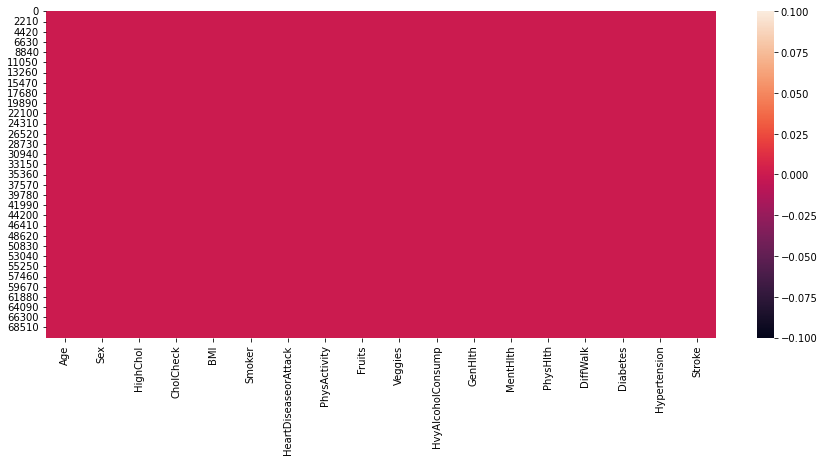

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isna())

#### Perbandingan Diabetes,Hipertensi, dan Stroke

            0.0    1.0
Diabetes  35346  35346


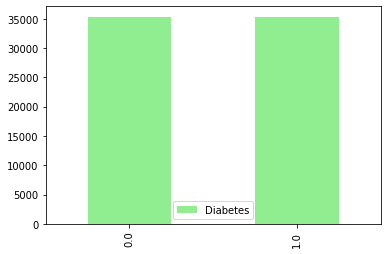

In [ ]:
Diabetes = pd.DataFrame(df['Diabetes'].value_counts())
print(Diabetes.T)
pd.DataFrame(df['Diabetes'].value_counts()).plot(kind='bar', color='lightgreen')
plt.show()

Jumlah data orang yang terkena diabetes dan tidak terkena diabetes seimbang

          0.0   1.0
Stroke  66297  4395


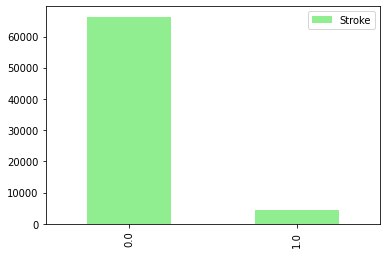

In [ ]:
stroke = pd.DataFrame(df['Stroke'].value_counts())
print(stroke.T)
pd.DataFrame(df['Stroke'].value_counts()).plot(kind='bar', color='lightgreen')
plt.show()

                1.0    0.0
Hypertension  39832  30860


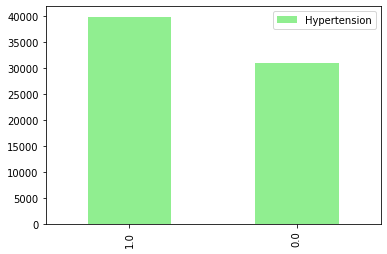

In [ ]:
hp = pd.DataFrame(df['Hypertension'].value_counts())
print(hp.T)
pd.DataFrame(df['Hypertension'].value_counts()).plot(kind='bar', color='lightgreen')
plt.show()

In [ ]:
del df['Hypertension']
del df['Stroke']

In [ ]:
#Kolom Hypertensi dan Stroke sudah dihapus
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

(70692, 16)

#### Visualisasi Data

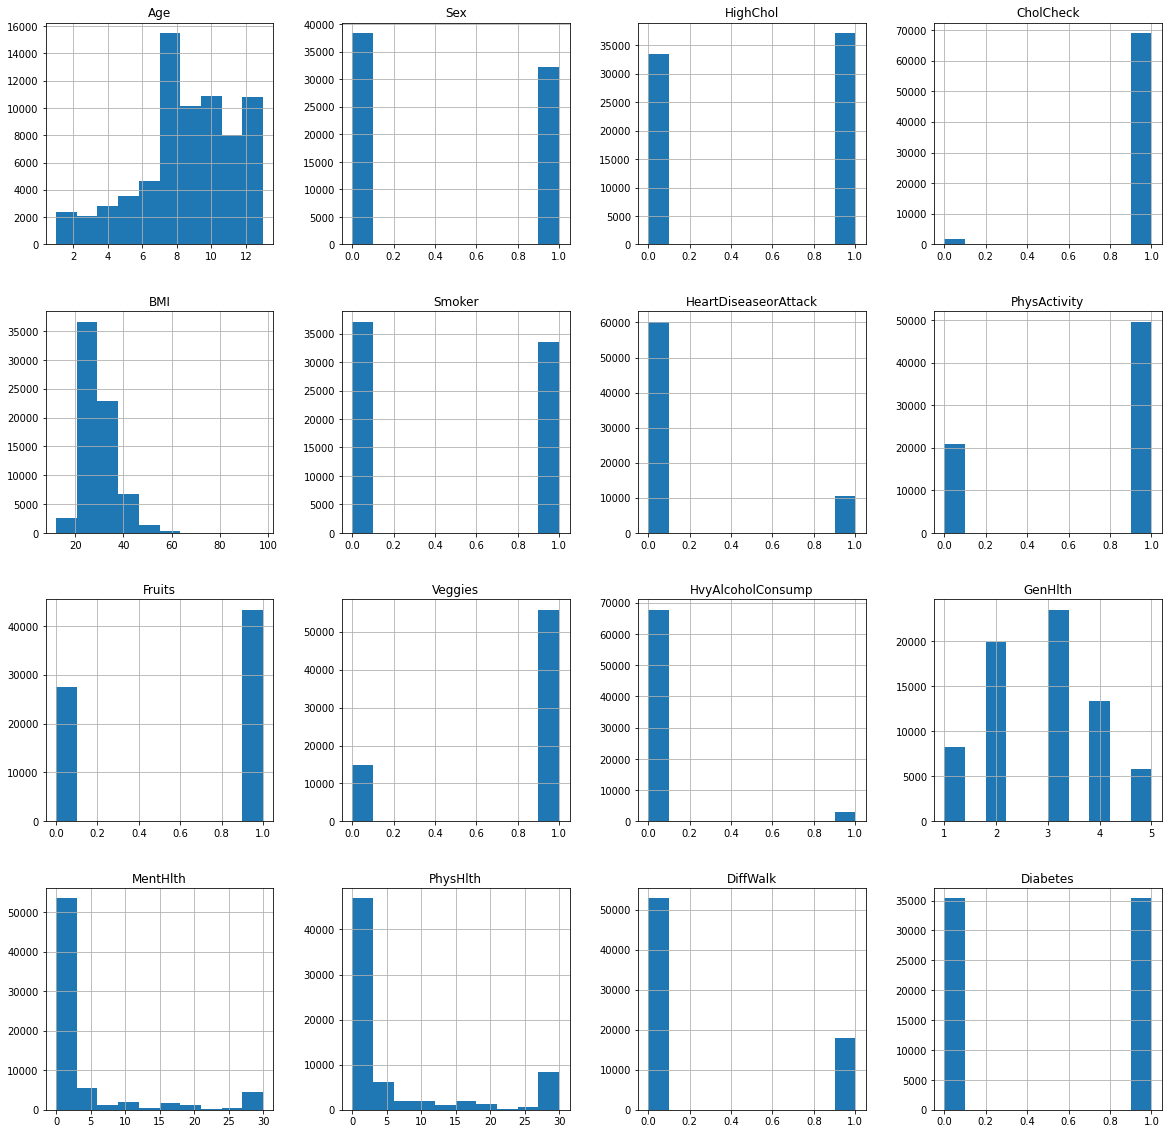

In [ ]:
p = df.hist(figsize = (20,20))
#0 = tidak, 1 = ya

In [ ]:
#Fungsi untuk membandingkan dua kolom
def plot_bivariate(col,hue):    
    if(df[col].nunique()>5):
        plt.figure(figsize=(20,10))   
        rot=90
    else:
        plt.figure(figsize=(10,7))
        rot=0
    def percentage(ax):
        heights = [[p.get_height() for p in bars] for bars in ax.containers] #Get the counts of each bar, make arrays when more than one in group
        for bars in ax.containers:
            for i, p in enumerate(bars):
                total = sum(group[i] for group in heights) #Sum total of each group
                percentage = (100 * p.get_height() / total) #Calculate % to annotate
                ax.annotate(format(p.get_height()), (p.get_x() + p.get_width()*0.5,0.8*p.get_height()), 
                    ha = 'center', va = 'bottom', rotation=0)
                if(percentage>25.0):
                    percentage = f'{percentage:.1f}%'
                    ax.annotate( percentage, (p.get_x() + p.get_width()*0.5, 0.25*p.get_height()), ha='center', va='center', rotation=rot)


    plot = sns.countplot(x=df[col], hue=df[hue],palette='pastel')
    percentage(plot) 

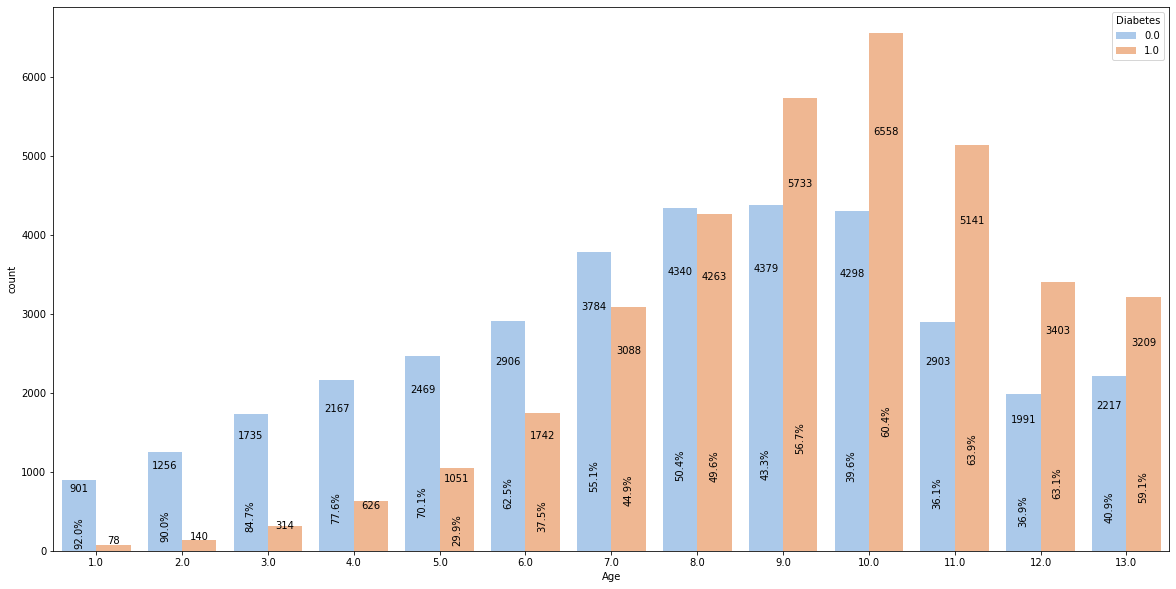

In [ ]:
#Umur dan Diabetes
plot_bivariate('Age','Diabetes')

1.   Orang yang terkena diabetes kebanyakan dari grup umur 9 (60-64 tahun), 10,dan 11.
2.   Hanya sedikit orang dari grup umur 1, 2,3, dan 4 yang terkena diabetes.



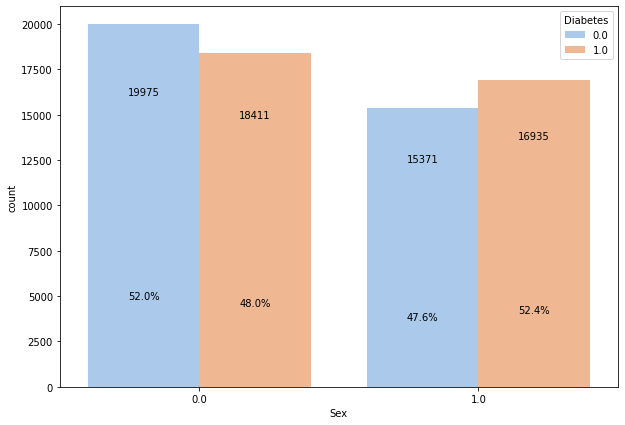

In [ ]:
#Gender dan Diabetes
plot_bivariate('Sex','Diabetes')
#0 = female, 1 = male

Dari keseluruhan responden, diabetes lebih banyak diderita oleh responden perempuan.

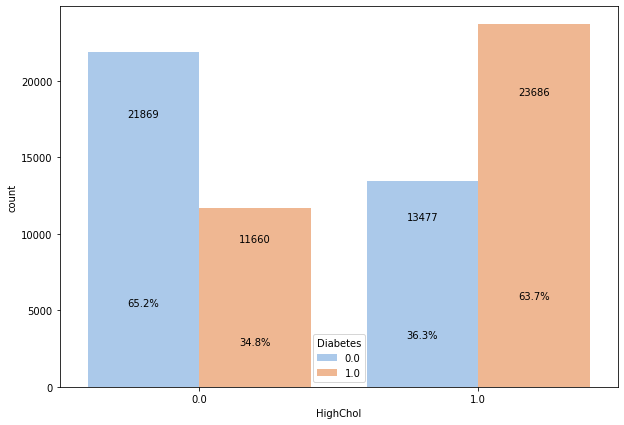

In [ ]:
#HighCholesterol dan Diabetes
plot_bivariate('HighChol','Diabetes')

Responden dengan kolestrol tinggi banyak yang mengidap diabetes

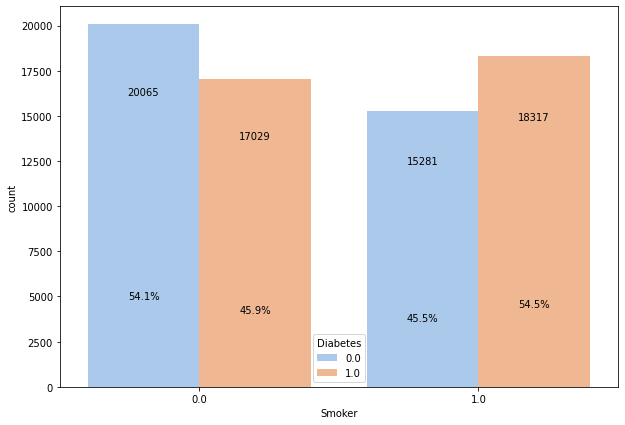

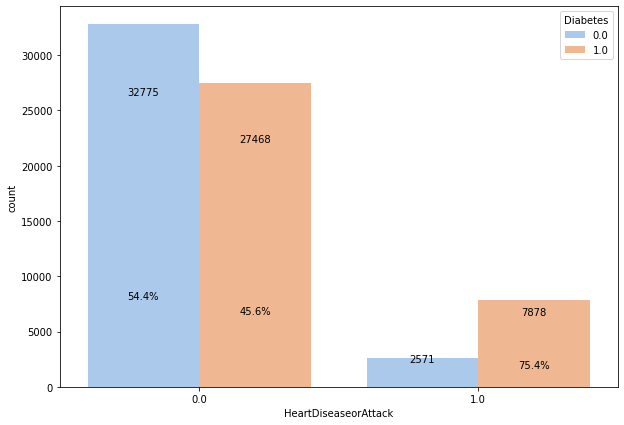

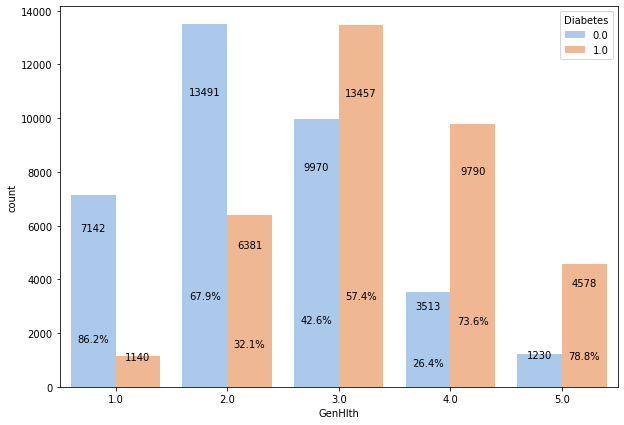

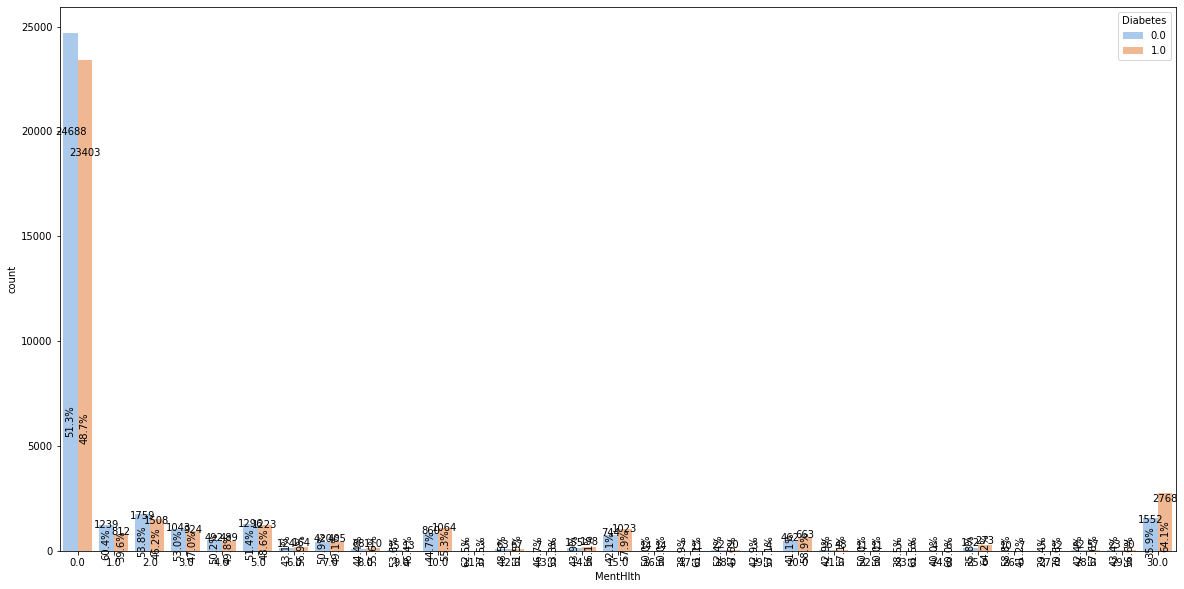

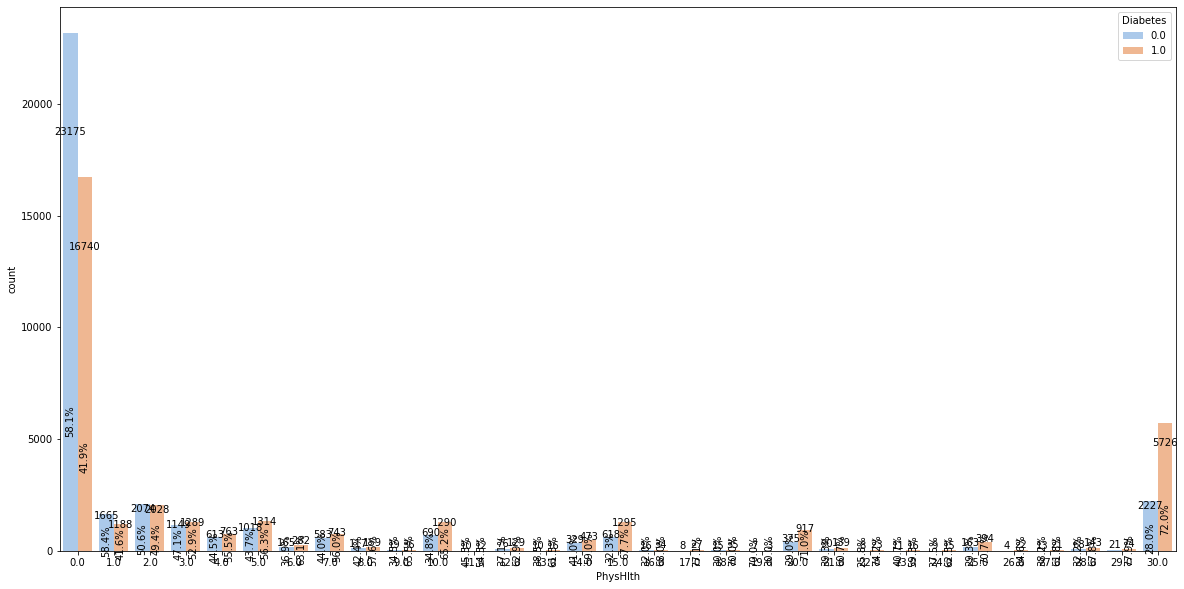

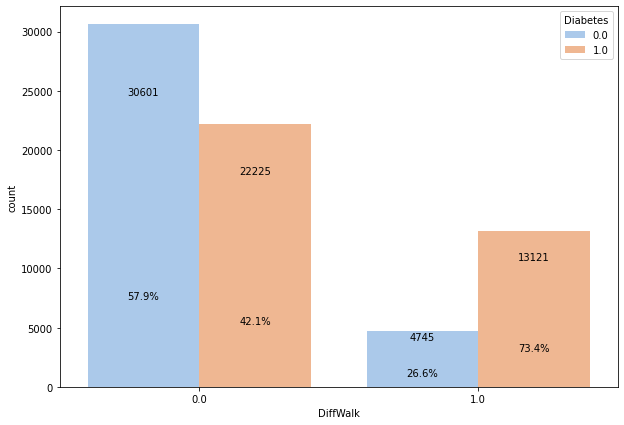

In [ ]:
plot_bivariate('Smoker', 'Diabetes')
plot_bivariate('HeartDiseaseorAttack','Diabetes')
plot_bivariate('GenHlth','Diabetes')
plot_bivariate('MentHlth','Diabetes')
plot_bivariate('PhysHlth','Diabetes')
plot_bivariate('DiffWalk','Diabetes')

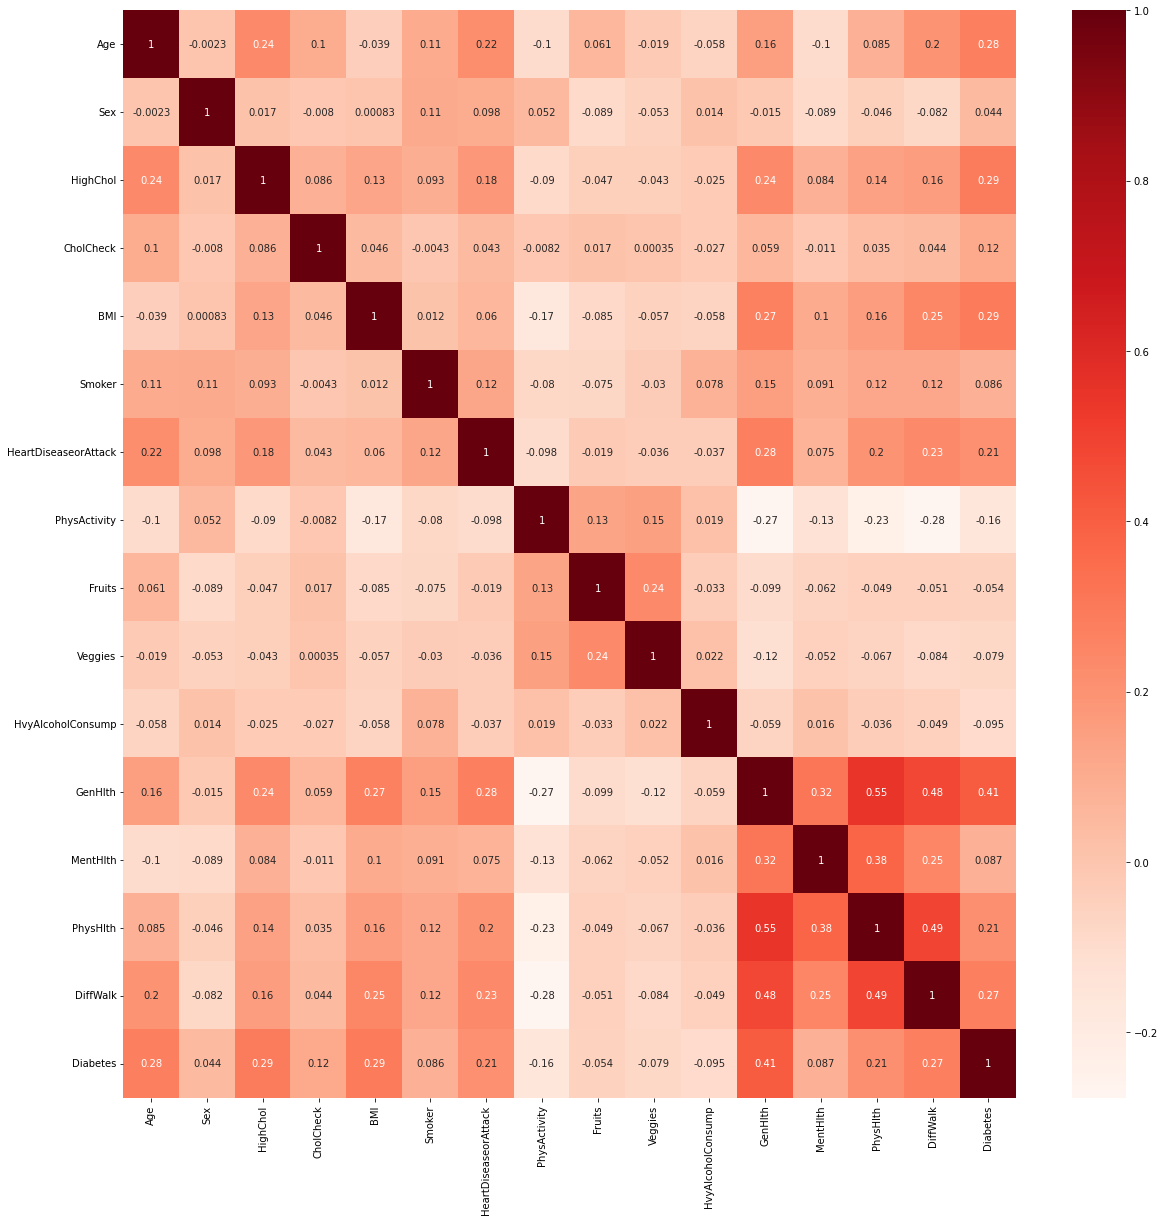

In [ ]:
# Pearson correlation heatmap
plt.figure(figsize=(20,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Berdasarkan Pearson correlation heatmap, atribut yang paling tinggi korelasinya adalah GenHlth, BMI, dan HighChol. Sedangkan yang paling rendah korelasinya adalah PhysActivity, HvyAlcoholConsump, dan Veggies.

#### Train Test Split

In [ ]:
#nilai test 0,2 dan nilai train 0,8
df_target=df[['Diabetes']].values
df_features=df.drop(columns=['Diabetes'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)

**Normalisasi Data**

In [ ]:
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

#### Balancing Dataset

In [ ]:
smote = SMOTE()

# fit predictor and target variable
x1_train_smote, y1_train_smote = smote.fit_resample(x1_train, y1_train)
x1_test_smote, y1_test_smote = smote.fit_resample(x1_test, y1_test)

print('Dataset Train')
print('Dataset awal', len(x1_train))
print('Dataset resampled', len(x1_train_smote), '\n')

print('Dataset Test')
print('Dataset awal', len(x1_test))
print('Dataset resampled', len(x1_test_smote), '\n')

x1_train, y1_train = x1_train_smote, y1_train_smote
x1_test, y1_test = x1_test_smote, y1_test_smote

Dataset Train
Dataset awal 56553
Dataset resampled 56828 

Dataset Test
Dataset awal 14139
Dataset resampled 14414 



## SVM

### StandardScaler()

#### Linear

In [ ]:
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(x1_train, y1_train)

#Memprediksi hasil berdasarkan data test asli yang tadi telah dibagi
y_predl = lsvclassifier.predict(x1_test)

#Memberikan output berupa confusion matrix dan akurasi dari datatest
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Akurasi: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Linear Model
Test Output:
Confusion Matrix:
[[5028 2179]
 [1581 5626]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      7207
         1.0       0.72      0.78      0.75      7207

    accuracy                           0.74     14414
   macro avg       0.74      0.74      0.74     14414
weighted avg       0.74      0.74      0.74     14414

Akurasi:  0.739142500346885


#### RBF

In [ ]:
print('RBF Model',end='\n')
rsvclassifier = SVC(kernel='rbf')
rsvclassifier.fit(x1_train, y1_train)

#Memprediksi hasil berdasarkan data test asli yang tadi telah dibagi
y_predl = rsvclassifier.predict(x1_test)

#Memberikan output berupa confusion matrix dan akurasi dari datatest
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Akurasi: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

RBF Model
Test Output:
Confusion Matrix:
[[4899 2308]
 [1428 5779]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72      7207
         1.0       0.71      0.80      0.76      7207

    accuracy                           0.74     14414
   macro avg       0.74      0.74      0.74     14414
weighted avg       0.74      0.74      0.74     14414

Akurasi:  0.7408075482170112


#### Polynomial

In [ ]:
print('Polynomial Model',end='\n')
psvclassifier = SVC(kernel='poly')
psvclassifier.fit(x1_train, y1_train)

#Memprediksi hasil berdasarkan data test asli yang tadi telah dibagi
y_predl = psvclassifier.predict(x1_test)

#Memberikan output berupa confusion matrix dan akurasi dari datatest
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Akurasi: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Polynomial Model
Test Output:
Confusion Matrix:
[[4949 2258]
 [1517 5690]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.69      0.72      7207
         1.0       0.72      0.79      0.75      7207

    accuracy                           0.74     14414
   macro avg       0.74      0.74      0.74     14414
weighted avg       0.74      0.74      0.74     14414

Akurasi:  0.738101845428056


#### Sigmoid

In [ ]:
print('Sigmoid Model',end='\n')
ssvclassifier = SVC(kernel='sigmoid')
ssvclassifier.fit(x1_train, y1_train)

#Memprediksi hasil berdasarkan data test asli yang tadi telah dibagi
y_predl = ssvclassifier.predict(x1_test)

#Memberikan output berupa confusion matrix dan akurasi dari datatest
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Akurasi: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Sigmoid Model
Test Output:
Confusion Matrix:
[[4690 2517]
 [2440 4767]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.65      0.65      7207
         1.0       0.65      0.66      0.66      7207

    accuracy                           0.66     14414
   macro avg       0.66      0.66      0.66     14414
weighted avg       0.66      0.66      0.66     14414

Akurasi:  0.6560982378243374


#### Perbandingan nilai akurasi metode SVM StandardScaler

  distance_list  Accuracy
0        linear  0.739143
1          poly  0.738102
2           rbf  0.740808
3       sigmoid  0.656098


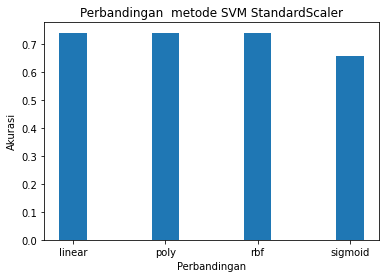

<Figure size 144x144 with 0 Axes>

Rata-rata keempat model: 0.7185375329540724


In [ ]:
distance_list=['linear','poly','rbf', 'sigmoid']
Accuracy_test=[0.739142500346885, 0.738101845428056, 0.7408075482170112, 0.6560982378243374]
 
d1=pd.DataFrame(list(zip(distance_list,Accuracy_test)),columns=['distance_list','Accuracy'])
print(d1)

# this is for plotting purpose
index = np.arange(len(distance_list))
plt.bar(distance_list, Accuracy_test,  width=0.3)
plt.xlabel('Perbandingan')
plt.ylabel('Akurasi')
plt.title('Perbandingan  metode SVM StandardScaler')
plt.figure(figsize=(2,2))
plt.show()

from statistics import mean
avg = mean(Accuracy_test)

print('Rata-rata keempat model:',avg)

### MinMaxScaler()

In [ ]:
# TTS
#nilai test 0,2 dan nilai train 0,8
df_target=df[['Diabetes']].values
df_features=df.drop(columns=['Diabetes'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)

#scaling using MinMaxScaler
mms = MinMaxScaler()
x1_train = mms.fit_transform(x1_train)
x1_test = mms.transform(x1_test)

In [ ]:
#balancing
smote = SMOTE()

# fit predictor and target variable
x1_train_smote, y1_train_smote = smote.fit_resample(x1_train, y1_train)
x1_test_smote, y1_test_smote = smote.fit_resample(x1_test, y1_test)

print('Dataset Train')
print('Dataset awal', len(x1_train))
print('Dataset resampled', len(x1_train_smote), '\n')

print('Dataset Test')
print('Dataset awal', len(x1_test))
print('Dataset resampled', len(x1_test_smote), '\n')

x1_train, y1_train = x1_train_smote, y1_train_smote
x1_test, y1_test = x1_test_smote, y1_test_smote

Dataset Train
Dataset awal 56553
Dataset resampled 56828 

Dataset Test
Dataset awal 14139
Dataset resampled 14414 



#### Linear

In [ ]:
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(x1_train, y1_train)

#Memprediksi hasil berdasarkan data test asli yang tadi telah dibagi
y_predl = lsvclassifier.predict(x1_test)

#Memberikan output berupa confusion matrix dan akurasi dari datatest
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Akurasi: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Linear Model
Test Output:
Confusion Matrix:
[[5039 2168]
 [1580 5627]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      7207
         1.0       0.72      0.78      0.75      7207

    accuracy                           0.74     14414
   macro avg       0.74      0.74      0.74     14414
weighted avg       0.74      0.74      0.74     14414

Akurasi:  0.7399750242819481


#### RBF

In [ ]:
print('RBF Model',end='\n')
psvclassifier = SVC(kernel='rbf')
psvclassifier.fit(x1_train, y1_train)

#Memprediksi hasil berdasarkan data test asli yang tadi telah dibagi
y_predl = psvclassifier.predict(x1_test)

#Memberikan output berupa confusion matrix dan akurasi dari datatest
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Akurasi: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Polynomial Model
Test Output:
Confusion Matrix:
[[4812 2395]
 [1399 5808]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.67      0.72      7207
         1.0       0.71      0.81      0.75      7207

    accuracy                           0.74     14414
   macro avg       0.74      0.74      0.74     14414
weighted avg       0.74      0.74      0.74     14414

Akurasi:  0.7367836825308728


#### Polynomial

In [ ]:
print('Polynomial Model',end='\n')
psvclassifier = SVC(kernel='poly')
psvclassifier.fit(x1_train, y1_train)

#Memprediksi hasil berdasarkan data test asli yang tadi telah dibagi
y_predl = psvclassifier.predict(x1_test)

#Memberikan output berupa confusion matrix dan akurasi dari datatest
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Akurasi: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Polynomial Model
Test Output:
Confusion Matrix:
[[4887 2320]
 [1419 5788]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72      7207
         1.0       0.71      0.80      0.76      7207

    accuracy                           0.74     14414
   macro avg       0.74      0.74      0.74     14414
weighted avg       0.74      0.74      0.74     14414

Akurasi:  0.7405994172332454


#### Sigmoid

In [ ]:
print('Sigmoid Model',end='\n')
psvclassifier = SVC(kernel='sigmoid')
psvclassifier.fit(x1_train, y1_train)

#Memprediksi hasil berdasarkan data test asli yang tadi telah dibagi
y_predl = psvclassifier.predict(x1_test)

#Memberikan output berupa confusion matrix dan akurasi dari datatest
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y1_test,y_predl))
print('Akurasi: ',sk.accuracy_score(y1_test, y_predl, normalize=True, sample_weight=None))

Sigmoid Model
Test Output:
Confusion Matrix:
[[3502 3705]
 [3653 3554]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.49      0.49      7207
         1.0       0.49      0.49      0.49      7207

    accuracy                           0.49     14414
   macro avg       0.49      0.49      0.49     14414
weighted avg       0.49      0.49      0.49     14414

Akurasi:  0.48952407381712226


#### Perbandingan nilai akurasi metode SVM MinMaxScaler

  distance_list  Accuracy
0        linear  0.739975
1          poly  0.740599
2           rbf  0.736784
3       sigmoid  0.489524


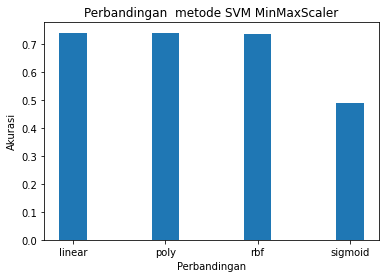

<Figure size 144x144 with 0 Axes>

Rata-rata keempat model: 0.6767205494657971


In [ ]:
distance_list=['linear','poly','rbf', 'sigmoid']
Accuracy_test=[0.7399750242819481, 0.7405994172332454, 0.7367836825308728, 0.48952407381712226]
 
d1=pd.DataFrame(list(zip(distance_list,Accuracy_test)),columns=['distance_list','Accuracy'])
print(d1)

# this is for plotting purpose
index = np.arange(len(distance_list))
plt.bar(distance_list, Accuracy_test,  width=0.3)
plt.xlabel('Perbandingan')
plt.ylabel('Akurasi')
plt.title('Perbandingan  metode SVM MinMaxScaler')
plt.figure(figsize=(2,2))
plt.show()

from statistics import mean
avg = mean(Accuracy_test)

print('Rata-rata keempat model:',avg)

### Perbandingan nilai rata-rata akurasi StandardScaler() dan MinMaxScaler()

      Method_list  Accuracy
0  StandardScaler  0.718538
1    MinMaxScaler  0.676721


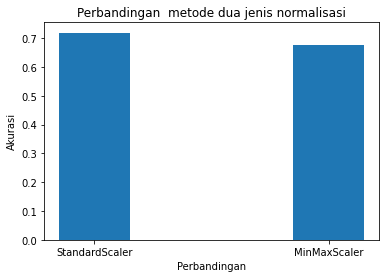

<Figure size 144x144 with 0 Axes>

In [ ]:
Method_list=['StandardScaler','MinMaxScaler']
Accuracy_test=[0.7185375329540724, 0.6767205494657971]
 
d1=pd.DataFrame(list(zip(Method_list,Accuracy_test)),columns=['Method_list','Accuracy'])
print(d1)

# this is for plotting purpose
index = np.arange(len(Method_list))
plt.bar(Method_list, Accuracy_test,  width=0.3)
plt.xlabel('Perbandingan')
plt.ylabel('Akurasi')
plt.title('Perbandingan  metode dua jenis normalisasi')
plt.figure(figsize=(2,2))
plt.show()

## Decision Tree

In [ ]:
# TTS
#nilai test 0,2 dan nilai train 0,8
df_target=df[['Diabetes']].values
df_features=df.drop(columns=['Diabetes'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)

#scaling using StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

#balancing
smote = SMOTE()

# fit predictor and target variable
x1_train_smote, y1_train_smote = smote.fit_resample(x1_train, y1_train)
x1_test_smote, y1_test_smote = smote.fit_resample(x1_test, y1_test)

print('Dataset Train')
print('Dataset awal', len(x1_train))
print('Dataset resampled', len(x1_train_smote), '\n')

print('Dataset Test')
print('Dataset awal', len(x1_test))
print('Dataset resampled', len(x1_test_smote), '\n')

x1_train, y1_train = x1_train_smote, y1_train_smote
x1_test, y1_test = x1_test_smote, y1_test_smote

Dataset Train
Dataset awal 56553
Dataset resampled 56828 

Dataset Test
Dataset awal 14139
Dataset resampled 14414 



### Entropy

In [ ]:
eclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
eclassifier.fit(x1_train, y1_train) 

y_pred = eclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test, y_pred))
print('Classification Report:')
print(sk.classification_report(y1_test, y_pred))
print('Akurasi: ',sk.accuracy_score(y1_test,y_pred))

Test Output:
Confusion Matrix:
[[4880 2327]
 [2659 4548]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.68      0.66      7207
         1.0       0.66      0.63      0.65      7207

    accuracy                           0.65     14414
   macro avg       0.65      0.65      0.65     14414
weighted avg       0.65      0.65      0.65     14414

Akurasi:  0.6540863049812682


Pada class 0 (tidak diabetes) nilai precisionnya adalah 0,65, recall adalah 0,68 dan seterusnya. Sedangkan pada class 1 (diabetes) nilai precisionnya adalah 0,66 dan seterusnya. Dengan nilai akurasi : 0.6540863049812682.

###Gini Index

In [ ]:
gclassifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
gclassifier.fit(x1_train, y1_train)

y_pred = gclassifier.predict(x1_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y1_test, y_pred))
print('Classification Report:')
print(sk.classification_report(y1_test, y_pred))
print('Akurasi: ',sk.accuracy_score(y1_test,y_pred))

Test Output:
Confusion Matrix:
[[4869 2338]
 [2745 4462]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66      7207
         1.0       0.66      0.62      0.64      7207

    accuracy                           0.65     14414
   macro avg       0.65      0.65      0.65     14414
weighted avg       0.65      0.65      0.65     14414

Akurasi:  0.6473567365061745


Pada class 0 (tidak diabetes) nilai precisionnya adalah 0,64 ;
recall adalah 0,68 dan seterusnya. Sedangkan pada class 1 (diabetes) nilai precisionnya adalah 0,66 ; f1-score 0,64 dan seterusnya. Dengan nilai akurasi : 0.6473567365061745. 

###Perbandingan nilai akurasi metode Entropy dan Gini Index

  distance_list  Accuracy
0       Entropy  0.654086
1          Gini  0.647357


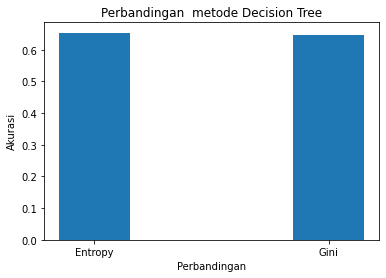

<Figure size 144x144 with 0 Axes>

Rata-rata model: 0.6507215207437214


In [ ]:
distance_list=['Entropy','Gini']
Accuracy_test=[0.6540863049812682, 0.6473567365061745]
 
d1=pd.DataFrame(list(zip(distance_list,Accuracy_test)),columns=['distance_list','Accuracy'])
print(d1)

# this is for plotting purpose
index = np.arange(len(distance_list))
plt.bar(distance_list, Accuracy_test,  width=0.3)
plt.xlabel('Perbandingan')
plt.ylabel('Akurasi')
plt.title('Perbandingan  metode Decision Tree')
plt.figure(figsize=(2,2))
plt.show()

from statistics import mean
avg = mean(Accuracy_test)

print('Rata-rata model:',avg)

## KNN

### Definisikan fungsi

In [ ]:
# Making the Confusion Matrix
def confusionmat(y,y_hat):
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm = confusion_matrix(y, y_hat)
  accu=accuracy_score(y,y_hat)
  print(cm,"\n")
  print("The accuracy is",accu)

In [ ]:
#Accuracy and Loss Curves
def learningcurve(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
def kfold(x1,y1):
  return cross_val_score(estimator = classifier, X = x1, y = y1, cv = 10)

In [ ]:
def knn_learningcurve(c, df_features, df_target):
  train_sizes, train_scores, test_scores = learning_curve(c, df_features, df_target,cv=10,n_jobs=-1)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)

  plt.figure()
  plt.title("KNNClassifier")
  plt.legend(loc="best")
  plt.xlabel("Training examples")
  plt.ylabel("Score")

  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")

  plt.legend(loc="best")
  # sizes the window for readability and displays the plot
  # shows error from 0 to 1.1
  plt.ylim(-.1,1.1)
  plt.show

In [ ]:
#Roc Curve
def roc_auc(yTest,y_pred):
    sns.set()
    fpr, tpr, thresholds = roc_curve(yTest, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Perhitungan KNN

KNN with n=  1
The Classification report
               precision    recall  f1-score   support

         0.0       0.66      0.66      0.66      7207
         1.0       0.66      0.66      0.66      7207

    accuracy                           0.66     14414
   macro avg       0.66      0.66      0.66     14414
weighted avg       0.66      0.66      0.66     14414

The Accuracy score with only 1 Training and Testing Data Set
 65.78326626890522
The mean of the accuracy scores with using 10 fold-cross validation
 65.83551336563107
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.682066257156693


KNN with n=  2
The Classification report
               precision    recall  f1-score   support

         0.0       0.61      0.81      0.70      7207
         1.0       0.72      0.48      0.57      7207

    accuracy                           0.64     14414
   macro avg       0.66      0.64      0.63     14414
weighted avg       0.66      0.64      0.63     14414

The Accuracy score with only 1 Training and Testing Data Set
 64.49979186901624
The mean of the accuracy scores with using 10 fold-cross validation
 64.49109879759581
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6050398041245917


KNN with n=  3
The Classification report
               precision    recall  f1-score   support

         0.0       0.70      0.67      0.68      7207
         1.0       0.68      0.71      0.70      7207

    accuracy                           0.69     14414
   macro avg       0.69      0.69      0.69     14414
weighted avg       0.69      0.69      0.69     14414

The Accuracy score with only 1 Training and Testing Data Set
 68.89829332593312
The mean of the accuracy scores with using 10 fold-cross validation
 69.32499486076624
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6640408483723564


KNN with n=  4
The Classification report
               precision    recall  f1-score   support

         0.0       0.66      0.76      0.70      7207
         1.0       0.72      0.61      0.66      7207

    accuracy                           0.68     14414
   macro avg       0.69      0.68      0.68     14414
weighted avg       0.69      0.68      0.68     14414

The Accuracy score with only 1 Training and Testing Data Set
 68.23921187734148
The mean of the accuracy scores with using 10 fold-cross validation
 68.49088839714933
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6351334722613743


KNN with n=  5
The Classification report
               precision    recall  f1-score   support

         0.0       0.72      0.67      0.70      7207
         1.0       0.69      0.74      0.71      7207

    accuracy                           0.70     14414
   macro avg       0.71      0.70      0.70     14414
weighted avg       0.71      0.70      0.70     14414

The Accuracy score with only 1 Training and Testing Data Set
 70.48008880255307
The mean of the accuracy scores with using 10 fold-cross validation
 70.46350221174411
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.5235299799311894


KNN with n=  6
The Classification report
               precision    recall  f1-score   support

         0.0       0.69      0.74      0.71      7207
         1.0       0.72      0.66      0.69      7207

    accuracy                           0.70     14414
   macro avg       0.70      0.70      0.70     14414
weighted avg       0.70      0.70      0.70     14414

The Accuracy score with only 1 Training and Testing Data Set
 70.07076453448036
The mean of the accuracy scores with using 10 fold-cross validation
 69.97431281213606
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.3515632445049781


KNN with n=  7
The Classification report
               precision    recall  f1-score   support

         0.0       0.73      0.67      0.70      7207
         1.0       0.70      0.76      0.73      7207

    accuracy                           0.71     14414
   macro avg       0.71      0.71      0.71     14414
weighted avg       0.71      0.71      0.71     14414

The Accuracy score with only 1 Training and Testing Data Set
 71.27792424032191
The mean of the accuracy scores with using 10 fold-cross validation
 71.47180500852161
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4028969429716396


KNN with n=  8
The Classification report
               precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      7207
         1.0       0.72      0.70      0.71      7207

    accuracy                           0.71     14414
   macro avg       0.72      0.71      0.71     14414
weighted avg       0.72      0.71      0.71     14414

The Accuracy score with only 1 Training and Testing Data Set
 71.49993062300541
The mean of the accuracy scores with using 10 fold-cross validation
 71.11283781519731
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4164613002495383


KNN with n=  9
The Classification report
               precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      7207
         1.0       0.70      0.77      0.73      7207

    accuracy                           0.72     14414
   macro avg       0.72      0.72      0.72     14414
weighted avg       0.72      0.72      0.72     14414

The Accuracy score with only 1 Training and Testing Data Set
 71.94394338837242
The mean of the accuracy scores with using 10 fold-cross validation
 71.99620443044996
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.5022715712580218


KNN with n=  10
The Classification report
               precision    recall  f1-score   support

         0.0       0.72      0.71      0.72      7207
         1.0       0.71      0.72      0.72      7207

    accuracy                           0.72     14414
   macro avg       0.72      0.72      0.72     14414
weighted avg       0.72      0.72      0.72     14414

The Accuracy score with only 1 Training and Testing Data Set
 71.62480921326488
The mean of the accuracy scores with using 10 fold-cross validation
 71.80616488792506
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.6511164500244478


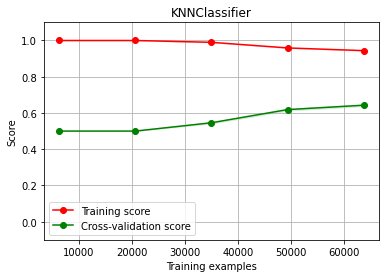

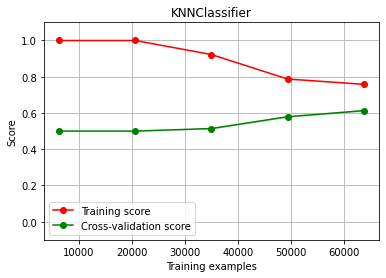

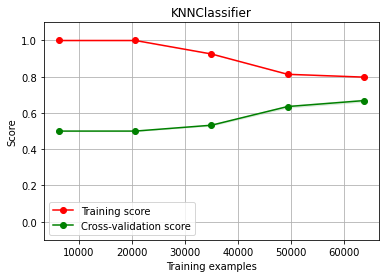

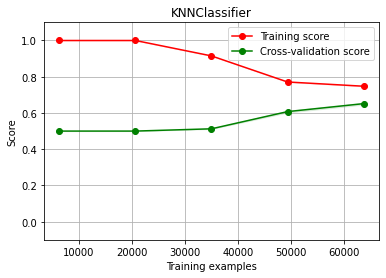

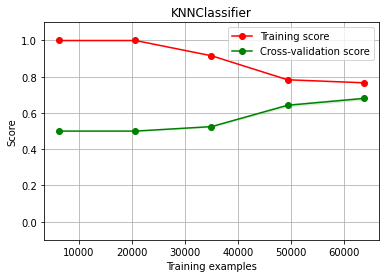

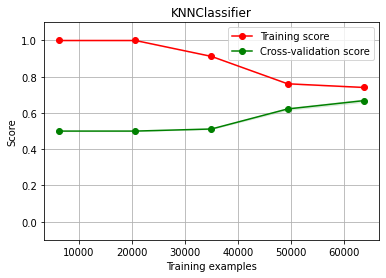

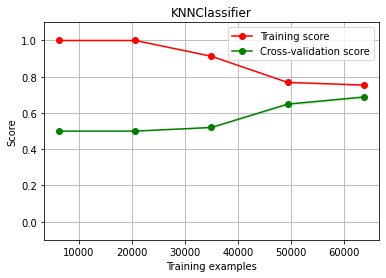

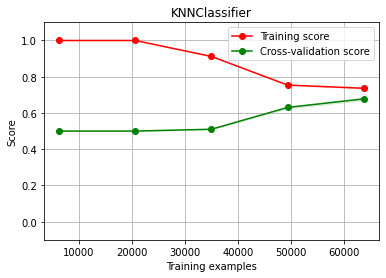

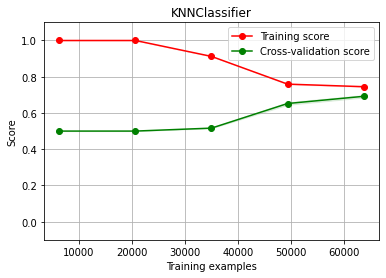

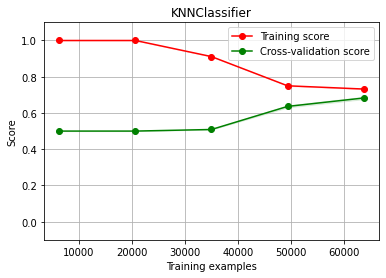

In [ ]:
k_list=[1,2,3,4,5,6,7,8,9,10]
accu_KNN=[]

for i in k_list:
  # Fitting K-NN to the Training set
  classifier = KNeighborsClassifier(n_neighbors = i)
  history=classifier.fit(x1_train, y1_train)

  # Predicting the Test set results
  y_pred = classifier.predict(x1_test)

  # 10 fold cross validation
  accuracies = kfold(x1_train, y1_train)

  accu_KNN+=[accuracies.mean()]
  std=accuracies.std()
  report=sk.classification_report(y1_test,y_pred)
  # confusionmat(y1_test, y_pred)

  print("KNN with n= ",i)
  print("The Classification report\n",report,end='\n')
  print("The Accuracy score with only 1 Training and Testing Data Set\n",sk.accuracy_score(y1_test,y_pred)*100,end='\n')
  #after using cross validation with 10 folds
  print("The mean of the accuracy scores with using 10 fold-cross validation\n",accuracies.mean()*100,end='\n')
  print("The Standard Deviation of the accuracy scores with using 10 fold-cross validation\n",std*100,end='\n')

  knn_learningcurve(classifier, df_features, df_target)

#### Manhattan

KNN with n=  9
The Classification report
               precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      7207
         1.0       0.70      0.76      0.73      7207

    accuracy                           0.72     14414
   macro avg       0.72      0.72      0.72     14414
weighted avg       0.72      0.72      0.72     14414

The Accuracy score with only 1 Training and Testing Data Set
 71.94394338837242
The mean of the accuracy scores with using 10 fold-cross validation
 71.96452823134857
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.5283090557117499


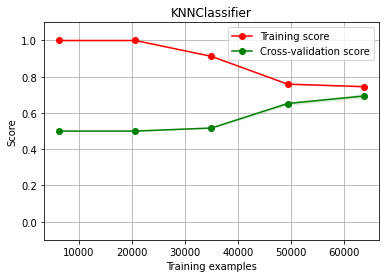

In [ ]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 9,metric="manhattan")
history=classifier.fit(x1_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(x1_test)

# 5 fold cross validation
accuracies = kfold(x1_train, y1_train)
accu_KNN=accuracies.mean()
std=accuracies.std()
report=sk.classification_report(y1_test,y_pred)
#confusionmat(y1_test, y_pred)

print("KNN with n= ",9)
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",sk.accuracy_score(y1_test,y_pred)*100,end='\n')
#after using cross validation with 5 folds
print("The mean of the accuracy scores with using 5 fold-cross validation\n",accuracies.mean()*100,end='\n')
print("The Standard Deviation of the accuracy scores with using 10 fold-cross validation\n",std*100,end='\n')

knn_learningcurve(classifier, df_features, df_target)

#### Chebyshev

KNN with n=  9
The Classification report
               precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      7207
         1.0       0.70      0.76      0.73      7207

    accuracy                           0.71     14414
   macro avg       0.72      0.71      0.71     14414
weighted avg       0.72      0.71      0.71     14414

The Accuracy score with only 1 Training and Testing Data Set
 71.36117663382822
The mean of the accuracy scores with using 10 fold-cross validation
 71.63897705123867
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4719405441493125


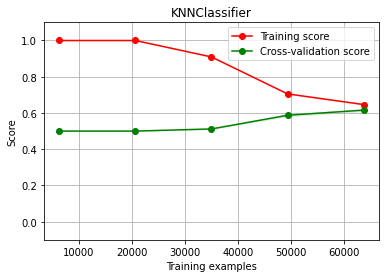

In [ ]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 9,metric="chebyshev")
history=classifier.fit(x1_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(x1_test)

# 10 fold cross validation
accuracies = kfold(x1_train, y1_train)
accu_KNN=accuracies.mean()
std=accuracies.std()
report=sk.classification_report(y1_test,y_pred)
#confusionmat(y1_test, y_pred)

print("KNN with n= ",9)
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",sk.accuracy_score(y1_test,y_pred)*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using 10 fold-cross validation\n",accuracies.mean()*100,end='\n')
print("The Standard Deviation of the accuracy scores with using 10 fold-cross validation\n",std*100,end='\n')

knn_learningcurve(classifier, df_features, df_target)

#### Euclidean

KNN with n=  9
The Classification report
               precision    recall  f1-score   support

         0.0       0.74      0.67      0.70      7207
         1.0       0.70      0.77      0.73      7207

    accuracy                           0.72     14414
   macro avg       0.72      0.72      0.72     14414
weighted avg       0.72      0.72      0.72     14414

The Accuracy score with only 1 Training and Testing Data Set
 71.88844179270154
The mean of the accuracy scores with using 10 fold-cross validation
 71.99092026380512
The Standard Deviation of the accuracy scores with using 10 fold-cross validation
 0.4985749077062143


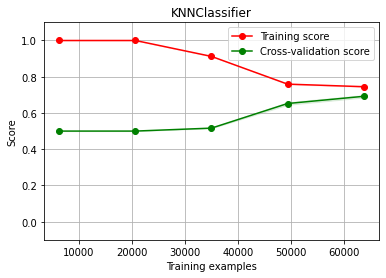

In [ ]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 9,metric="euclidean")
history=classifier.fit(x1_train, y1_train)

# Predicting the Test set results
y_pred = classifier.predict(x1_test)

# 10 fold cross validation
accuracies = kfold(x1_train, y1_train)
accu_KNN=accuracies.mean()
std=accuracies.std()
report=sk.classification_report(y1_test,y_pred)
#confusionmat(y1_test, y_pred)

print("KNN with n= ",9)
print("The Classification report\n",report,end='\n')
print("The Accuracy score with only 1 Training and Testing Data Set\n",sk.accuracy_score(y1_test,y_pred)*100,end='\n')
#after using cross validation with 10 folds
print("The mean of the accuracy scores with using 10 fold-cross validation\n",accuracies.mean()*100,end='\n')
print("The Standard Deviation of the accuracy scores with using 10 fold-cross validation\n",std*100,end='\n')

knn_learningcurve(classifier, df_features, df_target)

### Perbandingan nilai akurasi metode KNN

  distance_list   Accuracy
0     manhattan  71.943943
1     chebyshev  71.361177
2     euclidean  71.888442


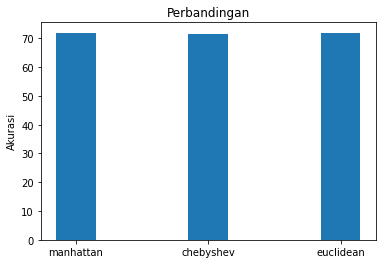

<Figure size 360x360 with 0 Axes>

In [ ]:
distance_list=['manhattan','chebyshev','euclidean']
Accuracy_test=[71.94394338,71.36117663,71.88844179]
 
d1=pd.DataFrame(list(zip(distance_list,Accuracy_test)),columns=['distance_list','Accuracy'])
print(d1)

# this is for plotting purpose
index = np.arange(len(distance_list))
plt.bar(distance_list, Accuracy_test,  width=0.3)
plt.ylabel('Akurasi')
plt.title('Perbandingan')
plt.figure(figsize=(5,5))
plt.show()

## Kesimpulan

            distance_list  Accuracy
0  SVM RBF StandardScaler  0.740808
1   Decision Tree Entropy  0.654086
2           KNN Manhattan  0.719439


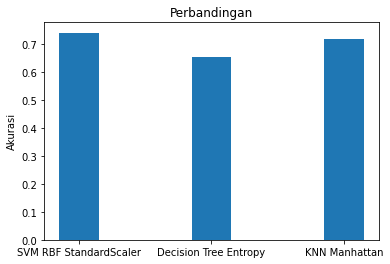

<Figure size 144x144 with 0 Axes>

In [ ]:
distance_list=['SVM RBF StandardScaler','Decision Tree Entropy','KNN Manhattan']
Accuracy_test=[0.7408075482170112,0.6540863049812682,0.71943943]
 
d1=pd.DataFrame(list(zip(distance_list,Accuracy_test)),columns=['distance_list','Accuracy'])
print(d1)

# this is for plotting purpose
index = np.arange(len(distance_list))
plt.bar(distance_list, Accuracy_test,  width=0.3)
plt.ylabel('Akurasi')
plt.title('Perbandingan')
plt.figure(figsize=(2,2))
plt.show()